In [1]:
#BOM!!
import os
from PIL import Image
import cv2
import numpy as np
print(cv2.__version__)


# pathHD='/media/wind/DERIVA_RANDOMICA/DERIVA_RANDOMICA/VIDEO/CAM1/T100/'
pathHD = '/home/hp/Documents/wavescatter_videos/DERIVA_RANDOMICA/VIDEO/CAM1/T100/'
saida = '/home/hp/Documents/wavescatter/code20180527/saidaFrames/'

vidcap = cv2.VideoCapture(pathHD+'T100_010100.CAM1.avi')
success,image = vidcap.read()
count = 0
#success = True
#while success:
seg=1.5

def printmeta(vidcap):
    framerate = vidcap.get(5)
    print("framerate:", framerate)
    framecount = vidcap.get(7)
    print("framecount:", framecount)
    #vidcap.set(5,1)
    #newframerate = vidcap.get(5)
    #print("newframerate:", newframerate)

printmeta(vidcap)

#while success:
for n in range(0,3500):#3500):
    if count % (30*seg) == 0:
        
        # Convert BGR to HSV
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        # define range of blue color in HSV
        lower_limit = np.array([  7, 125, 110])#[110,50,50])
        upper_limit = np.array([ 30, 198, 255])#[130,255,255])
        
        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_limit, upper_limit)
        
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image,image, mask= mask)
        #mask_inv = cv2.bitwise_not(mask)
        
        #segundos=np.round(count/(30*seg))
        cv2.imwrite(saida+"frame%05d.jpg" % count, res)     # save frame as JPEG file
        #print(count)
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1
    

cv2.destroyAllWindows()   

3.4.1
framerate: 30.00003000003
framecount: 18392.0


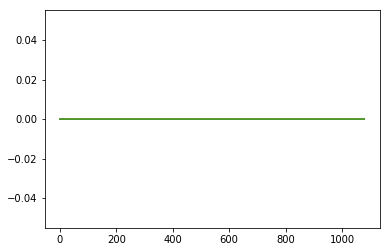

In [3]:
import matplotlib.pyplot as plt
#altura largura cor
#hsv[0:10,0,:]

a,l,c=np.shape(res)
plt.plot(res[:,round(l/5),:])
plt.show()

In [6]:
# salva o video
dir_path = saida
ext = 'jpg'
output = 'output.mp4'

images = []
for f in sorted(os.listdir(dir_path)):
    if f.endswith(ext):
        images.append(f)

# Determine the width and height from the first image
image_path = os.path.join(dir_path, images[0])
frame = cv2.imread(image_path)
cv2.imshow('video',frame)
height, width, channels = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
out = cv2.VideoWriter(output, fourcc, 20.0, (width, height))

for image in images:

    image_path = os.path.join(dir_path, image)
    frame = cv2.imread(image_path)

    out.write(frame) # Write out frame to video

    cv2.imshow('video',frame)
    if (cv2.waitKey(1) & 0xFF) == ord('q'): # Hit `q` to exit
        break

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

print("The output video is {}".format(output))



The output video is output.mp4


In [8]:
#BOM!!
from PIL import Image
import cv2
import numpy as np
import imutils
#print(cv2.__version__)


pathHD='./'
#saida='/home/wind/Documents/estudos/ONR/code20180527/saidaFrames/'

vidcap = cv2.VideoCapture(pathHD+'output.mp4')
success,image = vidcap.read()
count = 0
#success = True
#while success:
seg=1.5

def printmeta(vidcap):
    framerate = vidcap.get(5)
    print("framerate:", framerate)
    framecount = vidcap.get(7)
    print("framecount:", framecount)
    #vidcap.set(5,1)
    #newframerate = vidcap.get(5)
    #print("newframerate:", newframerate)

printmeta(vidcap)

while success:
#for n in range(0,3500):#3500):

    blurred = cv2.GaussianBlur(image, (11, 11), 0)
    # Convert BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_limit = np.array([  7, 125, 110])#[110,50,50])
    upper_limit = np.array([ 30, 198, 255])#[130,255,255])


    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_limit, upper_limit)
    # construct a mask for the color "green", then perform
    # a series of dilations and erosions to remove any small
    # blobs left in the mask
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)

    # find contours in the mask and initialize the current
    # (x, y) center of the ball
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    
    print(np.shape(cnts)) #<<<<< print
    
    center = None


    #print(count)
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1
    

cv2.destroyAllWindows()   

framerate: 20.0
framecount: 78.0
(4,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(4,)
(4,)
(4,)
(4,)
(5,)
(5,)
(5,)
(6,)
(9,)
(10,)
(9,)
(9,)
(9,)
(8,)
(9,)
(10,)
(10,)
(10,)
(10,)
(9,)
(10,)
(10,)
(10,)
(11,)
(11,)
(10,)
(12,)
(13,)
(12,)
(12,)
(12,)
(12,)
(12,)
(13,)
(12,)
(11,)
(13,)
(15,)
(13,)
(12,)
(11,)
(10,)
(8,)
(10,)
(9,)
(9,)
(5,)
(6,)
(7,)
(7,)
(4,)
(5,)
(4,)
(5,)
(5,)
(3,)
(3,)
(2,)
(1, 79, 1, 2)
(1, 41, 1, 2)
(0,)
(0,)
(0,)
